ok so im interested in the detailed statistics of people arriving in israel who have work permits

In [1]:
topic_of_interest = "Work Permit"
data_directory = r"C:\Users\vardonir\Documents\GitHub\CBSTest\Data"

in the early years, the files were called "Arrivals" and in the later years, they're called "Entrants"

the arrivals files tend to have more than one sheet, so im gonna treat them separately

the list of files will be obtained using `pathlib`'s `rglob`. why not loop through the files using `os`? because glob sounds funny.

In [2]:
from pathlib import Path

arrival_files = []
entry_files = []
for p in Path(data_directory).rglob(f"*{topic_of_interest}*.*"):
    if "Entrant" in p.name:
        entry_files.append(p)

    if "Arrival" in p.name:
        arrival_files.append(p)
        
len(entry_files)

17

i checked the 2007 and 2008 files

it seems like the format is consistent throughout the different years

headers are in row 7-9 and the latest data is in 34-55

spoiler alert: im actually wrong, but thats where the fun is

In [3]:
# pandas is for pandas
# xlrd and openpyxl are for reading xls and xlsx files
! pip install pandas xlrd openpyxl

the headers are a mess. look at this nonsense

this is the 2007 file

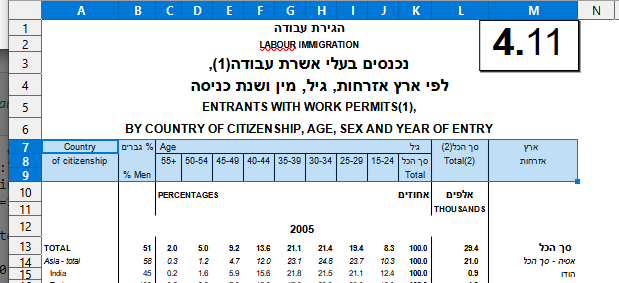

im gonna use the first file to get a sample of the headers

In [4]:
import pandas as pd

# use the first file to get the headers of the tables
header_rows = pd.read_excel(entry_files[0], skiprows=6, nrows=3)
headers = header_rows.values

# Combining the header rows
combined_header = []
for i in range(headers.shape[1]):  # Iterate over columns
    header_parts = [str(headers[j][i]) for j in range(headers.shape[0]) if str(headers[j][i]) != 'nan']
    combined_header.append(' '.join(header_parts))
# Thanks, ChatGPT

combined_header

['of citizenship',
 '   % Men',
 '55+ PERCENTAGES',
 '50-54',
 '45-49',
 '40-44',
 '35-39',
 '30-34',
 '25-29',
 '15-24',
 'סך הכל Total אחוזים',
 'Total(2) אלפים',
 'אזרחות']

which is not perfect. some manual wrangling is required but it's not a lot of work

ill copy-paste the ouput from above and rewrite it to something more palatable

and in english

In [5]:
columns = [
    "Country of Citizenship",
    "% Male",
     'Age 55+',
     '50-54',
     '45-49',
     '40-44',
     '35-39',
     '30-34',
     '25-29',
     '15-24',
    "Total Percentage",
    "Total in thousands",
    "Country of Citizenship (Hebrew)"
]

ill look at one of the tables manually to get more info about the rows

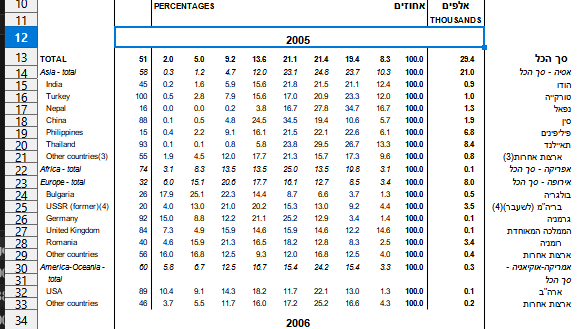

in this sample, the year is in row 12. in python terms, thats 11. so, skip 10 rows and read from there

spoiler alert: this wont generalize again

In [6]:
pd.read_excel(entry_files[0], skiprows=10, nrows=1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,THOUSANDS,Unnamed: 12
0,NaN,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
year = pd.read_excel(entry_files[0], skiprows=10, nrows=1)
year.dropna(axis=1, inplace=True)
year = year.iloc[0].values[0]

## a more readable version follows below
# df_with_the_year_in_the_row = pd.read_excel(entry_files[0], skiprows=10, nrows=1)
# df_but_its_on_its_own = df_with_the_year_in_the_row.dropna(axis=1)
# year = df_but_its_on_its_own.iloc[0].values[0]

year

2005

and also the dataframe

in the excel, the data starts from row 13 and goes on until row 33.

In [8]:
df = pd.read_excel(entry_files[0], skiprows=11, nrows=21)
df.dropna(inplace=True)
df.columns = columns
df

,Country of Citizenship,% Male,Age 55+,50-54,45-49,40-44,35-39,30-34,25-29,15-24,Total Percentage,Total in thousands,Country of Citizenship (Hebrew)
0,TOTAL,51.0,2.00,5.00,9.20,13.60,21.10,21.40,19.40,8.30,100.000000,29.400,סך הכל
1,Asia - total,58.0,0.26,1.15,4.73,11.98,23.08,24.84,23.68,10.27,99.985638,21.000,אסיה - סך הכל
2,India,45.0,0.21,1.61,5.91,15.57,21.80,21.48,21.05,12.35,100.000000,0.900,הודו
3,Turkey,100.0,0.51,2.84,7.90,15.60,17.02,20.87,23.30,11.96,100.000000,1.000,טורקייה
4,Nepal,16.0,0.00,0.00,0.24,3.82,16.73,27.81,34.74,16.65,100.000000,1.300,נפאל
5,China,88.0,0.05,0.54,4.76,24.47,34.49,19.44,10.56,5.68,100.000000,1.900,סין
6,Philippines,15.0,0.37,2.15,9.10,16.13,21.47,22.09,22.61,6.08,100.000000,6.800,פיליפינים
7,Thailand,93.0,0.09,0.11,0.75,5.80,23.82,29.45,26.68,13.30,100.000000,8.400,תאיילנד
8,Other countries(3),55.0,1.85,4.49,12.02,17.70,21.27,15.72,17.31,9.64,100.000000,0.800,ארצות אחרות(3)
9,Africa - total,74.0,3.13,8.33,13.54,13.54,25.00,13.54,19.79,3.13,100.000000,0.098,אפריקה - סך הכל


but look at row 8 - you know that that's supposed to be `Asia - other`. look at row 16 and 20. same thing.

so ill do the same manual wrangling as earlier. get the list, copy-paste it to something cleaner, then use that

In [9]:
df["Country of Citizenship"].to_list()

['TOTAL',
 'Asia - total',
 'India',
 'Turkey',
 'Nepal',
 'China',
 'Philippines',
 'Thailand',
 'Other countries(3)',
 'Africa - total',
 'Europe - total',
 'Bulgaria',
 'USSR (former)(4)',
 'Germany',
 'United Kingdom',
 'Romania',
 'Other countries',
 'America-Oceania - ',
 'USA',
 'Other countries']

In [10]:
cleaned_citizenship_list = [
     'Total',
     'Asia (total)',
     'India',
     'Turkey',
     'Nepal',
     'China',
     'Philippines',
     'Thailand',
     'Asia (other)',
     'Africa (total)',
     'Europe (total)',
     'Bulgaria',
     'Former USSR',
     'Germany',
     'United Kingdom',
     'Romania',
     'Europe (other)',
     'America/Oceania',
     'USA',
     'America/Oceania (other)'
]

side note, im not doing the same thing for the hebrew citizenship column because ani lo mevina ivrit. ill drop the column later

so its all cool now, right? im gonna create a dictionary of the dataframes where each of the keys is the year and the items are the dataframes.

BUT 

In [11]:
entry_file_dict = {}
for f in entry_files:
    year = pd.read_excel(f, skiprows=10, nrows=1)
    year.dropna(inplace=True, axis=1)
    year = year.iloc[0].values[0]
    
    print(f)
    df = pd.read_excel(f, skiprows=11, nrows=21)
    df.dropna(inplace=True)
    df.columns = columns
    
    df["Country of Citizenship"] = cleaned_citizenship_list
    df.drop("Country of Citizenship (Hebrew)", axis=1, inplace=True)

    entry_file_dict[year] = df


C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2007\4. Immigration\4.11 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls
C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2008\4. Immigration\4.11 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls
C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2009\4. Immigration\4.11 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls
C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2010\4. Immigration\4.11 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls
C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2011\4. Immigration\4.11 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls
C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2012\4. Immigration\4.14 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls
C:\Users\vardonir\Documents\GitHub\CBSTest\Dat

ValueError: Length of values (20) does not match length of index (19)

it doesnt like this line: `df["Country of Citizenship"] = cleaned_citizenship_list`

in 2015, they added Sri Lanka to the list of countries

so the country of citizenship list needs to be cleaned bit more automatically

the country of citizenship list has a pattern
```
original_citizenship_list = [
    'TOTAL',
     'Asia - total',
     'India',
     'Turkey',
     'Nepal',
     'China',
     'Philippines',
     'Thailand',
     'Other countries(3)',
     'Africa - total',
     'Europe - total',
     'Bulgaria',
     'USSR (former)(4)',
     'Germany',
     'United Kingdom',
     'Romania',
     'Other countries',
     'America-Oceania - ',
     'USA',
     'Other countries'
]
```

it's TOTAL -> Asia total -> (Asian countries) -> Other countries -> totals -> European countries -> Other countries, etc.

(3), (4) are just footnotes, so those can be removed too

In [12]:
def clean_citizenship_list(input_list):
    new_cleaned_citizenship_list = ["Total"]
    continent = ""
    for item in input_list[1:]:
        if item == "Turkey":  # i dont think i need to explain why this change was made
            new_cleaned_citizenship_list.append("Turkiye")
            continue
        if item == "USA":
            new_cleaned_citizenship_list.append("United States")
            continue
            
        if "USSR (former)" in item: # im not looking if it has "(4)" because they might add more footnotes in the future
            new_cleaned_citizenship_list.append("USSR (former)")
            continue

        if "America-Oceania" in item:
            new_cleaned_citizenship_list.append("America-Oceania - total")
            continent = "America-Oceania"
            continue

        if "total" in item:
            continent = item.split("-")[0].strip()

        if "Other" in item:
            new_cleaned_citizenship_list.append(f"{continent} - other")
            continue

        new_cleaned_citizenship_list.append(item)

    return new_cleaned_citizenship_list

algorithm is a bit weird but ill do what i can to explain it

ill loop through the citizenship list. if it's a country name that needs to be cleaned, i do that.

now, in the sample table above, "America-Oceania - total" is split into two rows. so ill look for that and fix it in the dataframe accordingly

now note the continent variable. the original list starts out in this pattern: "(Continent name) - total" right before the list of countries comes up. so when it hits the word "total" as it loops through the list, i know that the word "Other" is gonna come up sooner or later. i want to specify the continent when the word "Other" shows up, so when "total" is found, i keep that in a variable outside the loop, but i dont do anything with it yet. and when the name "Other" shows up later, i add "(Continent name) - other" to the list of citizenships

did that make sense? a demo might help

In [13]:
df = pd.read_excel(entry_files[0], skiprows=11, nrows=21)
df.dropna(inplace=True)
df.columns = columns

clean_citizenship_list(df["Country of Citizenship"].to_list())

['Total',
 'Asia - total',
 'India',
 'Turkiye',
 'Nepal',
 'China',
 'Philippines',
 'Thailand',
 'Asia - other',
 'Africa - total',
 'Europe - total',
 'Bulgaria',
 'USSR (former)',
 'Germany',
 'United Kingdom',
 'Romania',
 'Europe - other',
 'America-Oceania - total',
 'United States',
 'America-Oceania - other']

ok so cool

BUT

In [14]:
entry_file_dict = {}
for f in entry_files:
    year = pd.read_excel(f, skiprows=10, nrows=1)
    year.dropna(inplace=True, axis=1)
    year = year.iloc[0].values[0]
    
    print(year, f)
    df = pd.read_excel(f, skiprows=11, nrows=21)
    df.dropna(inplace=True)
    df.columns = columns

    df["Country of Citizenship"] = clean_citizenship_list(df["Country of Citizenship"].to_list())
    df.drop("Country of Citizenship (Hebrew)", axis=1, inplace=True)

    entry_file_dict[year] = df


2005 C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2007\4. Immigration\4.11 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls
2006 C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2008\4. Immigration\4.11 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls
2007 C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2009\4. Immigration\4.11 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls
2008 C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2010\4. Immigration\4.11 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls
2009 C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2011\4. Immigration\4.11 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls
2010 C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2012\4. Immigration\4.14 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls
2011 C:\Users\va

yea so theres no errors now

BUT

In [15]:
entry_file_dict.keys()

dict_keys([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 'Asia - total'])

"Asia - total" is not a year, silly. also, wheres the rest? the data is supposed to go up to 2022.

what happened?

(note that the first file in the entry_files list is 2007, so the table being extracted from the file is from 2 years prior to the publication of the file. theres also bottom table but ill get to that later)

it looks like it stopped reading things correctly in the 2015 file.

why

left is 2007, right is 2015

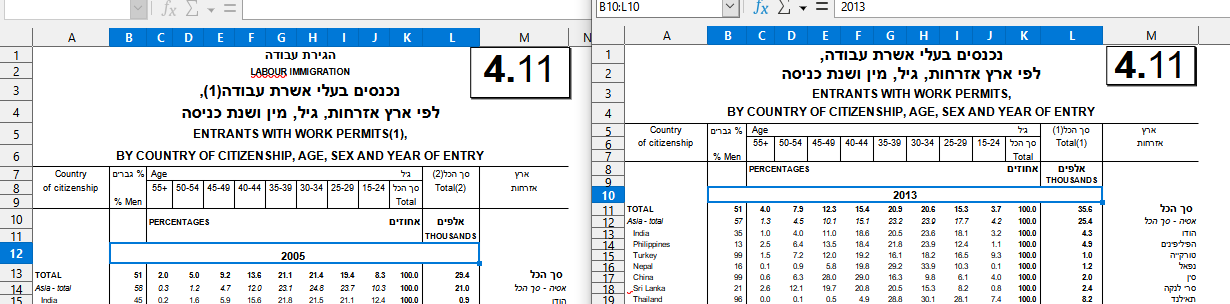

they changed the file header

so the year needs to be obtained more intelligently

it looks like from the tables that the year is in row where the cell where the row is located is a merged cell, the year value is in the "second" column and thats the only thing in that row

In [16]:
def get_row_number_of_where_the_year_is(file):
    # im also clearly not making an effort to write good function names
    # thanks again, chatgpt
    
    import numpy as np
    df = pd.read_excel(file)
    is_second_column_not_nan = df.iloc[:, 1].notna()
    is_others_nan = df.iloc[:, [i for i in range(df.shape[1]) if i != 1]].isna().all(axis=1)

    # Get indices of rows that satisfy both conditions
    row_indices = np.where(is_second_column_not_nan & is_others_nan)[0]
    
    return row_indices
       
get_row_number_of_where_the_year_is(r"C:\Users\vardonir\Documents\GitHub\CBSTest\Data\2015\4. Immigration\4.11 Entrants with Work Permits, by Country of Citizenship, Age, Sex and Year of Entry.xls")

array([ 8, 31], dtype=int64)

(im returning `row_indices` instead of `row_indices[0]` for reasons that will be made clear later

so we good now, right?

NOPE

In [17]:
entry_file_dict = {}
for f in entry_files:
    where_year_is = get_row_number_of_where_the_year_is(f)[0]
    
    year = pd.read_excel(f, skiprows=where_year_is, nrows=1)
    year.dropna(inplace=True, axis=1)
    year = year.iloc[0].values[0]
    
#     print(year, f)
    df = pd.read_excel(f, skiprows=11, nrows=21)
    df.dropna(inplace=True)
    df.columns = columns

    df["Country of Citizenship"] = clean_citizenship_list(df["Country of Citizenship"].to_list())
    df.drop("Country of Citizenship (Hebrew)", axis=1, inplace=True)

    entry_file_dict[year] = df

entry_file_dict.keys()

dict_keys([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, '(4)2020', '(4)2021'])

almost!

something is off with the last file

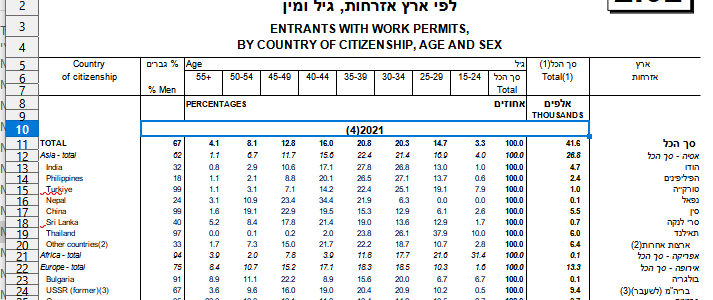

a footnote! in the year number!

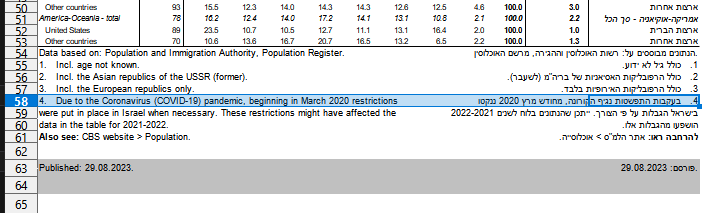

ahh that old thing

In [18]:
entry_file_dict = {}
for f in entry_files:
    where_year_is = get_row_number_of_where_the_year_is(f)[0]
    
    year = pd.read_excel(f, skiprows=where_year_is, nrows=1)
    year.dropna(inplace=True, axis=1)
    year = year.iloc[0].values[0]
    
#     print(year, f)
    df = pd.read_excel(f, skiprows=where_year_is + 1, nrows=21)
    df.dropna(inplace=True)
    df.columns = columns

    df["Country of Citizenship"] = clean_citizenship_list(df["Country of Citizenship"].to_list())
    df.drop("Country of Citizenship (Hebrew)", axis=1, inplace=True)

    if isinstance(year, str) and "(" in year:
        year = year.split(")")[-1]
    entry_file_dict[int(year)] = df

entry_file_dict.keys()

dict_keys([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

but note that in were using a 'magic number' in the nrows in the `read_excel` function

and this shows up when you look at the first and last dataframes in `entry_file_dict`

In [19]:
entry_file_dict[2005]

,Country of Citizenship,% Male,Age 55+,50-54,45-49,40-44,35-39,30-34,25-29,15-24,Total Percentage,Total in thousands
0,Total,51.0,2.00,5.00,9.20,13.60,21.10,21.40,19.40,8.30,100.000000,29.400
1,Asia - total,58.0,0.26,1.15,4.73,11.98,23.08,24.84,23.68,10.27,99.985638,21.000
2,India,45.0,0.21,1.61,5.91,15.57,21.80,21.48,21.05,12.35,100.000000,0.900
3,Turkiye,100.0,0.51,2.84,7.90,15.60,17.02,20.87,23.30,11.96,100.000000,1.000
4,Nepal,16.0,0.00,0.00,0.24,3.82,16.73,27.81,34.74,16.65,100.000000,1.300
5,China,88.0,0.05,0.54,4.76,24.47,34.49,19.44,10.56,5.68,100.000000,1.900
6,Philippines,15.0,0.37,2.15,9.10,16.13,21.47,22.09,22.61,6.08,100.000000,6.800
7,Thailand,93.0,0.09,0.11,0.75,5.80,23.82,29.45,26.68,13.30,100.000000,8.400
8,Asia - other,55.0,1.85,4.49,12.02,17.70,21.27,15.72,17.31,9.64,100.000000,0.800
9,Africa - total,74.0,3.13,8.33,13.54,13.54,25.00,13.54,19.79,3.13,100.000000,0.098


In [20]:
entry_file_dict[2021]

,Country of Citizenship,% Male,Age 55+,50-54,45-49,40-44,35-39,30-34,25-29,15-24,Total Percentage,Total in thousands
0,Total,67,4.1,8.1,12.8,16.0,20.8,20.3,14.7,3.3,100,41.6
1,Asia - total,62,1.1,6.7,11.7,15.6,22.4,21.4,16.9,4.0,100,26.8
2,India,32,0.8,2.9,10.6,17.1,27.8,26.8,13.0,1.0,100,4.7
3,Philippines,18,1.1,2.1,8.8,20.1,26.5,27.1,13.7,0.6,100,2.4
4,Turkiye,99,1.1,3.1,7.1,14.2,22.4,25.1,19.1,7.9,100,1.0
5,Nepal,24,3.1,10.9,23.4,34.4,21.9,6.3,0.0,0.0,100,0.1
6,China,99,1.6,19.1,22.9,19.5,15.3,12.9,6.1,2.6,100,5.5
7,Sri Lanka,40,5.2,8.4,17.8,21.4,19.0,13.6,12.9,1.7,100,0.7
8,Thailand,97,0.0,0.1,0.2,2.0,23.8,26.1,37.9,10.0,100,6.0
9,Asia - other,33,1.7,7.3,15.0,21.7,22.2,18.7,10.7,2.8,100,6.4


so thats not good

why did this happen? they added Sri Lanka in 2015, remember? so the number of rows in 2005 is not the same as the number of rows from 2015 onward. and maybe theyll add more contries, idk

so the number of rows needs to be calculated automatically

thats where the second value in `get_row_number_of_where_the_year_is` comes in - theres no space between the first and second tables, it just goes year -> table -> year -> table

so...

In [21]:
entry_file_dict = {}
for f in entry_files:
    where_year_is = get_row_number_of_where_the_year_is(f)[0]
    
    year = pd.read_excel(f, skiprows=where_year_is, nrows=1)
    year.dropna(inplace=True, axis=1)
    year = year.iloc[0].values[0]
    
    number_of_rows = get_row_number_of_where_the_year_is(f)[1] - get_row_number_of_where_the_year_is(f)[0]
#     print(year, f)
    df = pd.read_excel(f, skiprows=where_year_is + 1, nrows=number_of_rows)
    df.dropna(inplace=True)
    df.columns = columns

    df["Country of Citizenship"] = clean_citizenship_list(df["Country of Citizenship"].to_list())
    df.drop("Country of Citizenship (Hebrew)", axis=1, inplace=True)

    if isinstance(year, str) and "(" in year:
        year = year.split(")")[-1]
    entry_file_dict[int(year)] = df

entry_file_dict.keys()

dict_keys([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [22]:
entry_file_dict[2021]

,Country of Citizenship,% Male,Age 55+,50-54,45-49,40-44,35-39,30-34,25-29,15-24,Total Percentage,Total in thousands
0,Total,67,4.1,8.1,12.8,16.0,20.8,20.3,14.7,3.3,100.0,41.6
1,Asia - total,62,1.1,6.7,11.7,15.6,22.4,21.4,16.9,4.0,100.0,26.8
2,India,32,0.8,2.9,10.6,17.1,27.8,26.8,13.0,1.0,100.0,4.7
3,Philippines,18,1.1,2.1,8.8,20.1,26.5,27.1,13.7,0.6,100.0,2.4
4,Turkiye,99,1.1,3.1,7.1,14.2,22.4,25.1,19.1,7.9,100.0,1.0
5,Nepal,24,3.1,10.9,23.4,34.4,21.9,6.3,0.0,0.0,100.0,0.1
6,China,99,1.6,19.1,22.9,19.5,15.3,12.9,6.1,2.6,100.0,5.5
7,Sri Lanka,40,5.2,8.4,17.8,21.4,19.0,13.6,12.9,1.7,100.0,0.7
8,Thailand,97,0.0,0.1,0.2,2.0,23.8,26.1,37.9,10.0,100.0,6.0
9,Asia - other,33,1.7,7.3,15.0,21.7,22.2,18.7,10.7,2.8,100.0,6.4


yayy

(and also note that id like to get both the top and bottom tables in the last file, because it has 2021 and 2022)

In [23]:
last_entry_file = entry_files[-1]

In [24]:
# this another reason why get_row_number_of_where_the_year_is returns two values

row_where_the_first_year_is, row_where_the_second_year_is = get_row_number_of_where_the_year_is(last_entry_file)

year = pd.read_excel(f, skiprows=row_where_the_second_year_is, nrows=1)
year.dropna(inplace=True, axis=1)
year = year.iloc[0].values[0]

year

'(4)2022'

In [25]:
number_of_rows = get_row_number_of_where_the_year_is(f)[1] - get_row_number_of_where_the_year_is(f)[0]

df_2022 = pd.read_excel(f, skiprows=row_where_the_second_year_is + 1, nrows=number_of_rows)
df_2022.dropna(inplace=True)
df_2022.columns = columns

df_2022["Country of Citizenship"] = clean_citizenship_list(df_2022["Country of Citizenship"].to_list())
df_2022.drop("Country of Citizenship (Hebrew)", axis=1, inplace=True)

df_2022

,Country of Citizenship,% Male,Age 55+,50-54,45-49,40-44,35-39,30-34,25-29,15-24,Total Percentage,Total in thousands
0,Total,58.0,4.8,8.3,12.8,16.9,21.2,19.4,13.8,2.7,100.0,67.8
1,Asia - total,51.0,2.5,7.2,12.3,17.3,22.8,20.3,14.6,3.0,100.0,47.4
2,India,35.0,2.2,6.5,14.7,18.9,26.4,20.9,9.4,0.9,100.0,10.1
3,Philippines,18.0,3.2,5.5,13.6,23.0,24.2,22.4,7.6,0.5,100.0,9.2
4,Turkiye,99.0,1.7,4.5,8.4,15.1,24.3,22.5,16.4,7.0,100.0,1.5
5,Nepal,28.0,0.8,3.5,6.6,12.5,18.8,30.7,27.1,0.0,100.0,1.3
6,China,99.0,1.2,19.6,21.2,21.0,18.5,11.7,5.1,1.8,100.0,4.3
7,Sri Lanka,29.0,11.8,17.4,18.9,22.3,15.7,9.0,4.7,0.2,100.0,1.9
8,Thailand,98.0,0.0,0.0,0.1,3.5,22.6,27.9,37.2,8.6,100.0,9.2
9,Asia - other,35.0,3.4,9.8,16.3,21.6,21.3,14.9,9.6,3.1,100.0,9.9


In [26]:
entry_file_dict[2022] = df_2022

and now, the arrival files

In [27]:
arrival_files

[WindowsPath('C:/Users/vardonir/Documents/GitHub/CBSTest/Data/2001/4. Immigration/4.10 Arrivals of Work Permit Holders, by Year of Arrival, Country of Citizenship, \xa0Age and Sex.xls'),
 WindowsPath('C:/Users/vardonir/Documents/GitHub/CBSTest/Data/2002/4. Immigration/4.10 Arrivals of Work Permit Holders, by Year of Arrival, Country of Citizenship, \xa0Age and Sex.xls'),
 WindowsPath('C:/Users/vardonir/Documents/GitHub/CBSTest/Data/2003/4. Immigration/4.10 Arrivals of Work Permit Holders, by Year of Arrival, Country of Citizenship, Age and Sex.xls'),
 WindowsPath('C:/Users/vardonir/Documents/GitHub/CBSTest/Data/2004/4. Immigration/4.10 Arrivals of Work Permit Holders, by Year of Arrival, Country of Citizenship, Age and Sex.xls'),
 WindowsPath('C:/Users/vardonir/Documents/GitHub/CBSTest/Data/2005/4. Immigration/4.10 Arrivals of Work Permit Holders, by Year of Arrival, Country of Citizenship, Age and Sex.xls'),
 WindowsPath('C:/Users/vardonir/Documents/GitHub/CBSTest/Data/2006/4. Immigra

the CBS data starts at 1996, but the work permit holder data only starts at 2001

opening the 2001 file reveals that it has more than one sheet

In [28]:
first_sheet_name = "ST04-10A"
second_sheet_name = "ST04-10B"

now im sure that the `4-10` part of those sheet names wont generalize, but as shown in the entry_files files, it looks like they dont use the multi-sheet format anymore. so ill leave it as-is

now the input of the functions from earlier just read the file using read_excel, with the excel file as the input parameter - that wont work if theres multuple sheets in the file, itll just end up reading the first one

In [29]:
def get_row_number_of_where_the_year_is_but_specifying_the_sheet_name(file, sheet_name):
    
    import numpy as np
    
    xls = pd.ExcelFile(file)
    df = pd.read_excel(xls, sheet_name)   

    is_second_column_not_nan = df.iloc[:, 1].notna()
    is_others_nan = df.iloc[:, [i for i in range(df.shape[1]) if i != 1]].isna().all(axis=1)

    # Get indices of rows that satisfy both conditions
    row_indices = np.where(is_second_column_not_nan & is_others_nan)[0]
    
    return row_indices
       
get_row_number_of_where_the_year_is_but_specifying_the_sheet_name(arrival_files[0], second_sheet_name)

array([ 9, 32], dtype=int64)

In [30]:
arrival_file_dict = {}
for f in arrival_files:
    year_1, year_2 = get_row_number_of_where_the_year_is_but_specifying_the_sheet_name(f, first_sheet_name)
    
    xls = pd.ExcelFile(f)
    year = pd.read_excel(xls, first_sheet_name, skiprows=year_1, nrows=1)   
    year.dropna(inplace=True, axis=1)
    year = year.iloc[0].values[0]
    
    number_of_rows = year_2 - year_1
#     print(year, f)
    df = pd.read_excel(xls, first_sheet_name, skiprows=year_1 + 1, nrows=number_of_rows)   
    df.dropna(inplace=True)
    df.columns = columns

    df["Country of Citizenship"] = clean_citizenship_list(df["Country of Citizenship"].to_list())
    df.drop("Country of Citizenship (Hebrew)", axis=1, inplace=True)

    if isinstance(year, str) and "(" in year:
        year = year.split(")")[-1]
    arrival_file_dict[int(year)] = df

arrival_file_dict.keys()

dict_keys([1996, 1997, 1998, 1999, 2000, 2001])

In [31]:
arrival_file_dict[2001]

,Country of Citizenship,% Male,Age 55+,50-54,45-49,40-44,35-39,30-34,25-29,15-24,Total Percentage,Total in thousands
0,Total,77.0,1.9,3.9,9.0,14.0,19.6,23.8,18.8,9.0,100.0,78.2
1,Asia - total,74.0,0.7,1.1,4.6,11.3,24.6,27.8,20.5,9.4,100.0,39.1
2,India,74.0,1.0,6.7,5.7,12.5,17.0,22.2,24.5,10.4,100.0,0.6
3,Turkiye,99.0,0.5,2.0,6.6,11.4,19.4,22.0,23.0,15.1,100.0,4.9
4,China,99.0,0.1,0.3,4.9,14.3,36.4,27.1,11.9,4.9,100.0,11.8
5,Philippines,16.0,0.6,2.2,7.3,16.4,21.7,24.2,21.2,6.4,100.0,8.9
6,Thailand,92.0,1.0,0.2,0.7,3.9,18.2,35.1,27.5,13.4,100.0,11.7
7,Asia - other,70.0,3.6,3.2,9.7,16.8,16.1,18.4,19.3,12.9,100.0,1.2
8,Africa - total,63.0,2.6,3.0,7.9,9.2,16.5,21.8,23.3,15.8,100.0,0.5
9,Europe - total,80.0,2.9,6.7,13.7,17.1,14.8,19.8,16.8,8.3,100.0,36.9


the last file in arrival_files would have the rest

2002 is the second table in the first sheet of the 2006 file

In [32]:
last_arrival_file = arrival_files[-1]

year_1, year_2 = get_row_number_of_where_the_year_is_but_specifying_the_sheet_name(last_arrival_file, first_sheet_name)
number_of_rows = year_2 - year_1

xls = pd.ExcelFile(last_arrival_file)
df_2002 = pd.read_excel(xls, first_sheet_name, skiprows=year_1 + 1, nrows=number_of_rows)   
df_2002.dropna(inplace=True)
df_2002.columns = columns

df_2002["Country of Citizenship"] = clean_citizenship_list(df_2002["Country of Citizenship"].to_list())
df_2002.drop("Country of Citizenship (Hebrew)", axis=1, inplace=True)

df_2002

,Country of Citizenship,% Male,Age 55+,50-54,45-49,40-44,35-39,30-34,25-29,15-24,Total Percentage,Total in thousands
0,Total,77.0,1.9,3.9,9.0,14.0,19.6,23.8,18.8,9.0,100.0,78.2
1,Asia - total,74.0,0.7,1.1,4.6,11.3,24.6,27.8,20.5,9.4,100.0,39.1
2,India,74.0,1.0,6.7,5.7,12.5,17.0,22.2,24.5,10.4,100.0,0.6
3,Turkiye,99.0,0.5,2.0,6.6,11.4,19.4,22.0,23.0,15.1,100.0,4.9
4,China,99.0,0.1,0.3,4.9,14.3,36.4,27.1,11.9,4.9,100.0,11.8
5,Philippines,16.0,0.6,2.2,7.3,16.4,21.7,24.2,21.2,6.4,100.0,8.9
6,Thailand,92.0,1.0,0.2,0.7,3.9,18.2,35.1,27.5,13.4,100.0,11.7
7,Asia - other,70.0,3.6,3.2,9.7,16.8,16.1,18.4,19.3,12.9,100.0,1.2
8,Africa - total,63.0,2.6,3.0,7.9,9.2,16.5,21.8,23.3,15.8,100.0,0.5
9,Europe - total,80.0,2.9,6.7,13.7,17.1,14.8,19.8,16.8,8.3,100.0,36.9


and 2003 + 2004 is in the next sheet

In [33]:
year_1, year_2 = get_row_number_of_where_the_year_is_but_specifying_the_sheet_name(last_arrival_file, second_sheet_name)
number_of_rows = year_2 - year_1

xls = pd.ExcelFile(last_arrival_file)
df_2003 = pd.read_excel(xls, second_sheet_name, skiprows=year_1 + 1, nrows=number_of_rows)   

df_2003.dropna(inplace=True)
df_2003.columns = columns

df_2003["Country of Citizenship"] = clean_citizenship_list(df_2003["Country of Citizenship"].to_list())
df_2003.drop("Country of Citizenship (Hebrew)", axis=1, inplace=True)

df_2003

,Country of Citizenship,% Male,Age 55+,50-54,45-49,40-44,35-39,30-34,25-29,15-24,Total Percentage,Total in thousands
0,Total,61.9,2.4,5.0,10.8,13.4,21.9,21.8,16.8,7.8,100.0,31.1
1,Asia - total,67.1,0.9,1.6,6.7,11.6,25.4,25.3,19.2,9.3,100.0,20.5
2,India,60.3,0.7,3.7,6.0,10.6,23.2,25.5,20.5,9.9,100.0,0.4
3,Turkiye,99.4,0.3,2.0,5.8,12.4,18.8,23.0,25.0,12.8,100.0,1.8
4,China,91.9,0.2,0.4,3.7,15.4,32.7,30.1,12.7,4.7,100.0,1.4
5,Philippines,15.5,0.5,2.2,9.3,18.3,22.5,23.5,19.7,3.9,100.0,6.4
6,Thailand,91.7,0.4,0.2,0.6,4.7,22.6,32.1,24.8,14.7,100.0,6.3
7,Asia - other,93.4,2.5,2.7,13.3,10.2,34.6,17.2,9.9,9.6,100.0,4.3
8,Africa - total,74.2,1.9,0.9,17.6,17.6,15.7,21.8,15.3,9.3,100.0,0.2
9,Europe - total,50.0,5.4,12.3,19.2,17.0,15.4,14.9,11.2,4.5,100.0,9.7


In [34]:
year_1, year_2 = get_row_number_of_where_the_year_is_but_specifying_the_sheet_name(last_arrival_file, second_sheet_name)
number_of_rows = year_2 - year_1

xls = pd.ExcelFile(last_arrival_file)
df_2004 = pd.read_excel(xls, second_sheet_name, skiprows=year_2 + 1, nrows=number_of_rows)   

df_2004.dropna(inplace=True)
df_2004.columns = columns

df_2004["Country of Citizenship"] = clean_citizenship_list(df_2004["Country of Citizenship"].to_list())
df_2004.drop("Country of Citizenship (Hebrew)", axis=1, inplace=True)

df_2004

,Country of Citizenship,% Male,Age 55+,50-54,45-49,40-44,35-39,30-34,25-29,15-24,Total Percentage,Total in thousands
0,Total,73.0,1.5,5.3,8.6,12.4,24.1,21.0,17.4,9.5,100.000000,47.9
1,Asia - total,79.8,0.4,2.9,5.7,11.1,26.1,23.0,19.5,11.2,99.985638,37.6
2,India,66.6,0.4,1.8,4.4,10.4,19.1,25.3,26.8,11.7,100.000000,1.0
3,Turkiye,99.4,0.4,2.4,7.8,14.8,18.7,23.8,22.0,9.8,100.000000,1.4
4,Jordan(5),100.0,0.6,6.1,8.0,10.2,30.5,16.1,15.4,13.0,100.000000,14.1
5,China,92.6,0.2,1.2,6.3,20.8,34.7,21.8,9.9,4.7,100.000000,2.8
6,Philippines,16.2,0.3,1.7,8.0,15.9,22.2,23.3,22.1,6.4,100.000000,6.5
7,Thailand,92.7,0.2,0.2,1.0,6.3,22.9,31.7,24.3,13.2,100.000000,10.4
8,Asia - other,56.0,0.9,0.6,3.5,10.6,18.7,25.3,24.9,15.3,100.000000,1.3
9,Africa - total,79.4,5.9,14.8,14.1,15.6,25.9,11.1,10.4,2.2,100.000000,0.1


but waiiiiit

Jordan has a footnote

for the sake of consistency, im gonna update the clean citizenship list function

footnotes have the format `(NUMBER)`. im not going to look for parenthesis because itll end up removing "(former)" in "USSR (former)", and that format might come up again in countries that changed their names

REgex to the REscue

:)

In [35]:
def clean_citizenship_list_generalized(input_list):
    import re

    pattern = r'\((\d+)\)(?!\w)'

    new_cleaned_citizenship_list = ["Total"]
    continent = ""

    for item in input_list[1:]:
        # if theres footnotes in the item, then the "result" variable wont be the same as the original item
        result = re.sub(pattern, '', item)
        if result != item:
            new_cleaned_citizenship_list.append(result)
            continue

        if item == "Turkey":
            new_cleaned_citizenship_list.append("Turkiye")
            continue
        if item == "USA":
            new_cleaned_citizenship_list.append("United States")
            continue

        if "America-Oceania" in item:
            new_cleaned_citizenship_list.append("America-Oceania - total")
            continent = "America-Oceania"
            continue

        if "total" in item:
            continent = item.split("-")[0].strip()

        if "Other" in item:
            new_cleaned_citizenship_list.append(f"{continent} - other")
            continue

        new_cleaned_citizenship_list.append(item)

    return new_cleaned_citizenship_list

xls = pd.ExcelFile(last_arrival_file)
df_2004 = pd.read_excel(xls, second_sheet_name, skiprows=year_2 + 1, nrows=number_of_rows)   

df_2004.dropna(inplace=True)
df_2004.columns = columns

clean_citizenship_list_generalized(df_2004["Country of Citizenship"].to_list())

# df_2004["Country of Citizenship"] = clean_citizenship_list_generalized(df_2004["Country of Citizenship"].to_list())
# df_2004.drop("Country of Citizenship (Hebrew)", axis=1, inplace=True)

# df_2004

['Total',
 'Asia - total',
 'India',
 'Turkiye',
 'Jordan',
 'China',
 'Philippines',
 'Thailand',
 'Other countries',
 'Africa - total',
 'Europe - total',
 'Bulgaria',
 'USSR (former)',
 'Germany',
 'United Kingdom',
 'Romania',
 'Europe - other',
 'America-Oceania - total',
 'United States',
 'America-Oceania - other']

but waiiiiiiiit

"Asia - other" got broken because the "Other countries" entry in Asia also had a footnote

the fix is kinda simple but its hard to explain how it works. something python something something

In [36]:
def clean_citizenship_list_generalized(input_list):
    import re

    pattern = r'\((\d+)\)(?!\w)'

    new_cleaned_citizenship_list = ["Total"]
    continent = ""

    for item in input_list[1:]:
        # if theres footnotes in the item, then the "result" variable wont be the same as the original item
        result = re.sub(pattern, '', item)
        if result != item:
            item = result

        if item == "Turkey":
            new_cleaned_citizenship_list.append("Turkiye")
            continue
        if item == "USA":
            new_cleaned_citizenship_list.append("United States")
            continue

        if "America-Oceania" in item:
            new_cleaned_citizenship_list.append("America-Oceania - total")
            continent = "America-Oceania"
            continue

        if "total" in item:
            continent = item.split("-")[0].strip()

        if "Other" in item:
            new_cleaned_citizenship_list.append(f"{continent} - other")
            continue

        new_cleaned_citizenship_list.append(item)

    return new_cleaned_citizenship_list

xls = pd.ExcelFile(last_arrival_file)
df_2004 = pd.read_excel(xls, second_sheet_name, skiprows=year_2 + 1, nrows=number_of_rows)   

df_2004.dropna(inplace=True)
df_2004.columns = columns

df_2004["Country of Citizenship"] = clean_citizenship_list_generalized(df_2004["Country of Citizenship"].to_list())
df_2004.drop("Country of Citizenship (Hebrew)", axis=1, inplace=True)

df_2004

,Country of Citizenship,% Male,Age 55+,50-54,45-49,40-44,35-39,30-34,25-29,15-24,Total Percentage,Total in thousands
0,Total,73.0,1.5,5.3,8.6,12.4,24.1,21.0,17.4,9.5,100.000000,47.9
1,Asia - total,79.8,0.4,2.9,5.7,11.1,26.1,23.0,19.5,11.2,99.985638,37.6
2,India,66.6,0.4,1.8,4.4,10.4,19.1,25.3,26.8,11.7,100.000000,1.0
3,Turkiye,99.4,0.4,2.4,7.8,14.8,18.7,23.8,22.0,9.8,100.000000,1.4
4,Jordan,100.0,0.6,6.1,8.0,10.2,30.5,16.1,15.4,13.0,100.000000,14.1
5,China,92.6,0.2,1.2,6.3,20.8,34.7,21.8,9.9,4.7,100.000000,2.8
6,Philippines,16.2,0.3,1.7,8.0,15.9,22.2,23.3,22.1,6.4,100.000000,6.5
7,Thailand,92.7,0.2,0.2,1.0,6.3,22.9,31.7,24.3,13.2,100.000000,10.4
8,Asia - other,56.0,0.9,0.6,3.5,10.6,18.7,25.3,24.9,15.3,100.000000,1.3
9,Africa - total,79.4,5.9,14.8,14.1,15.6,25.9,11.1,10.4,2.2,100.000000,0.1


In [37]:
data_list = arrival_file_dict | {
    2002: df_2002,
    2003: df_2003,
    2004: df_2004
} | entry_file_dict

data_list.keys()

dict_keys([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

so that i can load this later, ill save it into a single excel file

In [38]:
with pd.ExcelWriter('compiled.xlsx') as writer:  
    for year, df in data_list.items():
        df.to_excel(writer, sheet_name=str(year))


whee

now what